In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Handle missing values

In [4]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["number"]).columns

In [5]:
from sklearn.impute import SimpleImputer

num_imp = SimpleImputer(strategy="mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

In [6]:
df['country'] = df['country'].astype(str).str.strip()
df['country'] = df['country'].replace('?', np.nan)


imp = SimpleImputer(strategy='most_frequent')
df[['country']] = imp.fit_transform(df[['country']])

df['country'].value_counts()

country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece              

In [7]:
# Clean text columns
df['education'] = df['education'].str.strip().str.title()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

high_edu = ['Doctorate', 'Masters', 'Bachelors']
mid_edu  = ['Assoc-Acdm', 'Assoc-Voc', 'Some-College']

df['High_Potential'] = (
    df['education'].isin(high_edu).astype(int) * 2 +
    df['education'].isin(mid_edu).astype(int) +
    (df['hours-per-week'] >= 45).astype(int) +
    (df['capital-gain'] > 0).astype(int) +
    (df['country'] == 'United-States').astype(int) +
    (df['sex'] == 'Male').astype(int) +
    (df['race'] == 'White').astype(int)
    >= 5
).astype(int)
df['High_Potential']

0        1
1        1
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    0
32559    0
32560    0
Name: High_Potential, Length: 32561, dtype: int64

In [8]:
# Strip spaces and standardize capitalization
# Clean text columns
df['education'] = df['education'].str.strip().str.title()
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

high_edu = ['Doctorate', 'Masters', 'Bachelors']
mid_edu  = ['Assoc-Acdm', 'Assoc-Voc', 'Some-College']

df['High_Potential'] = (
    df['education'].isin(high_edu).astype(int) * 2 +
    df['education'].isin(mid_edu).astype(int) +
    (df['hours-per-week'] >= 45).astype(int) +
    (df['capital-gain'] > 0).astype(int) +
    (df['country'] == 'United-States').astype(int) +
    (df['sex'] == 'Male').astype(int) +
    (df['race'] == 'White').astype(int)
    >= 6
).astype(int)




EDA :exploratory data analaysis

High_Potential_Label
HIGH    4.963528e+08
LOW     5.683021e+09
Name: fnlwgt, dtype: float64


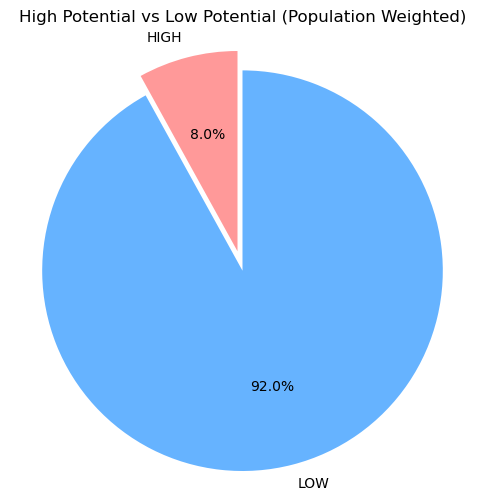

In [9]:
# how balanced our classes are?

df['High_Potential_Label'] = df['High_Potential'].map({1: 'HIGH', 0: 'LOW'})
classes_count = df['High_Potential_Label'].value_counts()

weighted_counts = df.groupby('High_Potential_Label')['fnlwgt'].sum()
print(weighted_counts)

plt.figure(figsize=(6,6))
plt.pie(
    weighted_counts,
    labels=weighted_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff9999", "#66b3ff"],
    explode=(0.1, 0)  # highlight HIGH
)
plt.title("High Potential vs Low Potential (Population Weighted)")
plt.axis('equal')
plt.show()



[Text(0, 0, '21790'), Text(0, 0, '10771')]

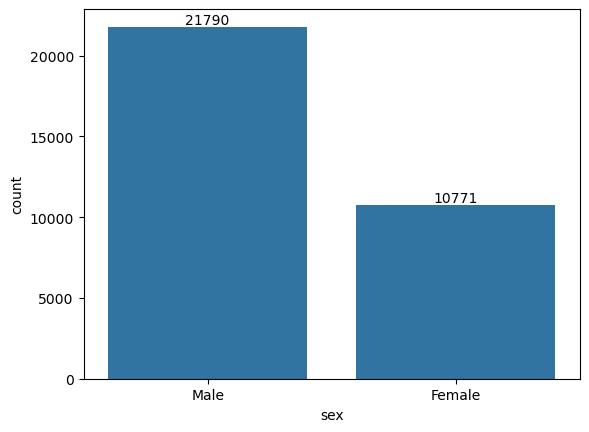

In [10]:

gender_cnt = df["sex"].value_counts()
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])

[Text(0, 0, '27816'),
 Text(0, 0, '3124'),
 Text(0, 0, '1039'),
 Text(0, 0, '311'),
 Text(0, 0, '271')]

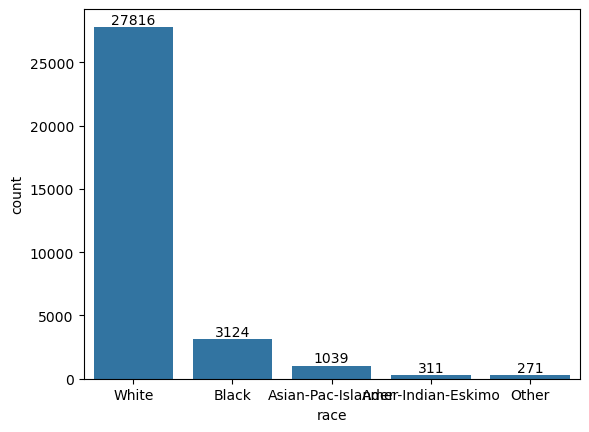

In [11]:

gender_cnt = df["race"].value_counts()
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])

[Text(0, 0, '4140'),
 Text(0, 0, '4099'),
 Text(0, 0, '4066'),
 Text(0, 0, '3770'),
 Text(0, 0, '3650'),
 Text(0, 0, '3295'),
 Text(0, 0, '2002'),
 Text(0, 0, '1843'),
 Text(0, 0, '1597'),
 Text(0, 0, '1370'),
 Text(0, 0, '994'),
 Text(0, 0, '928'),
 Text(0, 0, '649'),
 Text(0, 0, '149'),
 Text(0, 0, '9')]

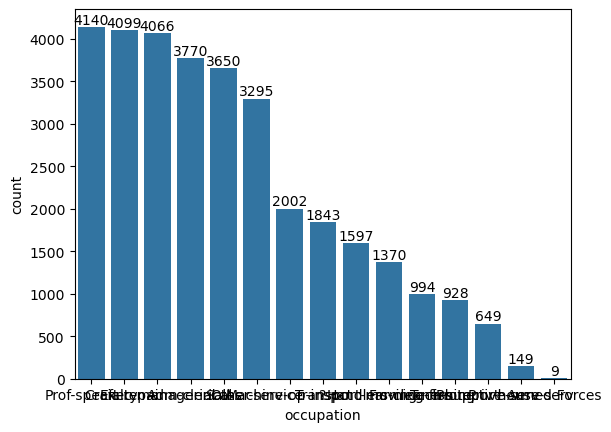

In [12]:
gender_cnt = df["occupation"].value_counts()
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])

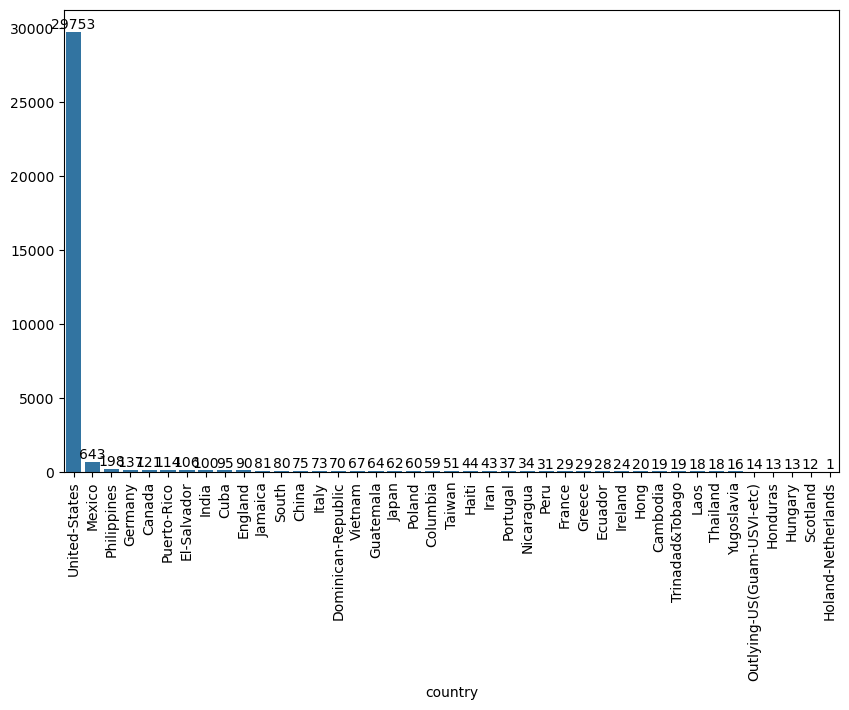

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


country_counts = df['country'].value_counts()


plt.figure(figsize=(10,6))
ax = sns.barplot(x=country_counts.index, y=country_counts.values)

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),  
        (p.get_x() + p.get_width() / 2., p.get_height()),  
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xticks(rotation=90) 
plt.show()


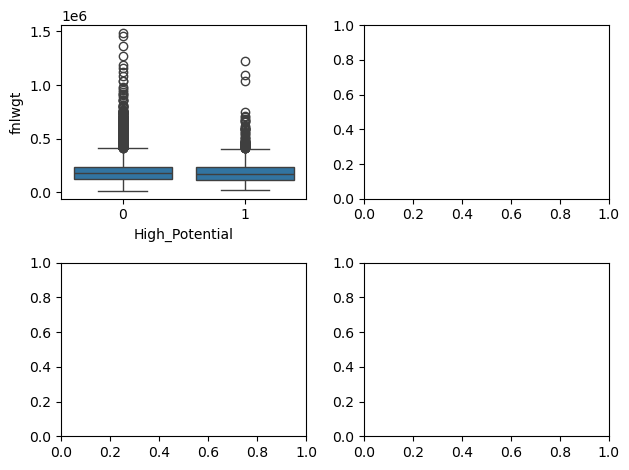

In [14]:
fig, axes = plt.subplots(2, 2)

sns.boxplot(ax=axes[0, 0], data=df, x="High_Potential",y="fnlwgt")
# sns.boxplot(ax=axes[0, 1], data=df, x="High_Potential",y="country_score")
# sns.boxplot(ax=axes[1, 0], data=df, x="High_Potential",y="capital_score")
# sns.boxplot(ax=axes[1, 1], data=df, x="High_Potential",y="work_score")

plt.tight_layout()

<Axes: xlabel='education-num', ylabel='Count'>

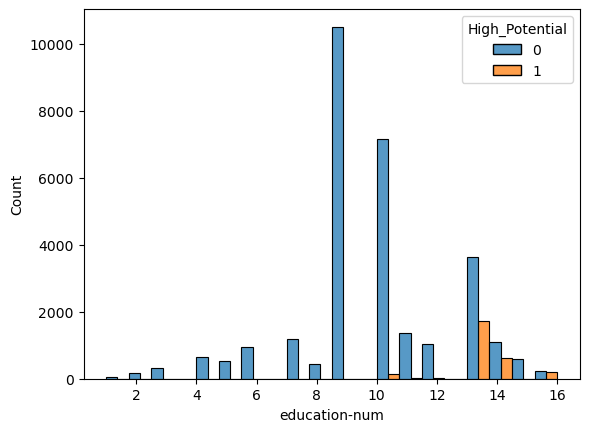

In [15]:
sns.histplot(
    data=df,
    x="education-num",
    hue="High_Potential",
    bins=20,
    multiple="dodge"
)

<Axes: xlabel='age', ylabel='Count'>

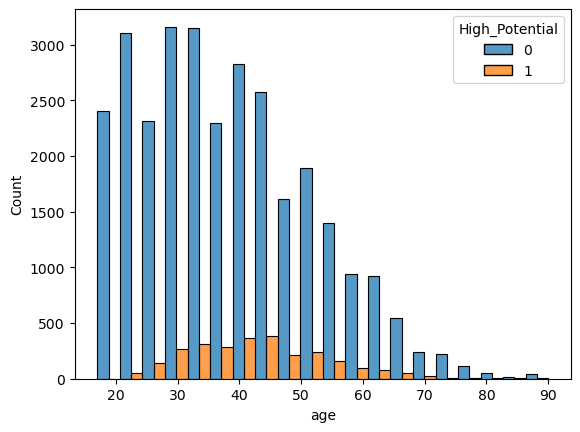

In [16]:
sns.histplot(
    data=df,
    x="age",
    hue="High_Potential",
    bins=20,
    multiple="dodge"
)

encoding

In [17]:
# df = df.drop("fnlwgt", axis=1)
# df = df.drop("High_Potential_1", axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   32561 non-null  float64
 1   workclass             32561 non-null  object 
 2   fnlwgt                32561 non-null  float64
 3   education             32561 non-null  object 
 4   education-num         32561 non-null  float64
 5   marital-status        32561 non-null  object 
 6   occupation            32561 non-null  object 
 7   relationship          32561 non-null  object 
 8   race                  32561 non-null  object 
 9   sex                   32561 non-null  object 
 10  capital-gain          32561 non-null  float64
 11  capital-loss          32561 non-null  float64
 12  hours-per-week        32561 non-null  float64
 13  country               32561 non-null  object 
 14  salary                32561 non-null  object 
 15  High_Potential     

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df["education"] = le.fit_transform(df["education"])
df["country"] = le.fit_transform(df["country"])
df["race"] = le.fit_transform(df["race"])
df["capital-gain"] = le.fit_transform(df["capital-gain"])
df["workclass"] = le.fit_transform(df["workclass"])
df["age"] = le.fit_transform(df["age"])
df["marital-status"] = le.fit_transform(df["marital-status"])
df["occupation"] = le.fit_transform(df["occupation"])
df["relationship"] = le.fit_transform(df["relationship"])
df["hours-per-week"] = le.fit_transform(df["hours-per-week"])
df["salary"] = le.fit_transform(df["salary"])
df["capital-gain"] = le.fit_transform(df["capital-gain"])
df["High_Potential"] = le.fit_transform(df["High_Potential"])


In [19]:
cols = ['sex']

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=df.index)

df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

In [20]:
df.drop(columns=['potential_score_1'], errors='ignore', inplace=True)
df.drop(columns=['potential_score_2'], errors='ignore', inplace=True)
df.drop(columns=['potential_score_3'], errors='ignore', inplace=True)
df.drop(columns=['potential_score_4'], errors='ignore', inplace=True)
df.drop(columns=['potential_score_5'], errors='ignore', inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   32561 non-null  int64  
 1   workclass             32561 non-null  int64  
 2   fnlwgt                32561 non-null  float64
 3   education             32561 non-null  int64  
 4   education-num         32561 non-null  float64
 5   marital-status        32561 non-null  int64  
 6   occupation            32561 non-null  int64  
 7   relationship          32561 non-null  int64  
 8   race                  32561 non-null  int64  
 9   capital-gain          32561 non-null  int64  
 10  capital-loss          32561 non-null  float64
 11  hours-per-week        32561 non-null  int64  
 12  country               32561 non-null  int64  
 13  salary                32561 non-null  int64  
 14  High_Potential        32561 non-null  int64  
 15  High_Potential_Labe

corelation heatmap

<Axes: >

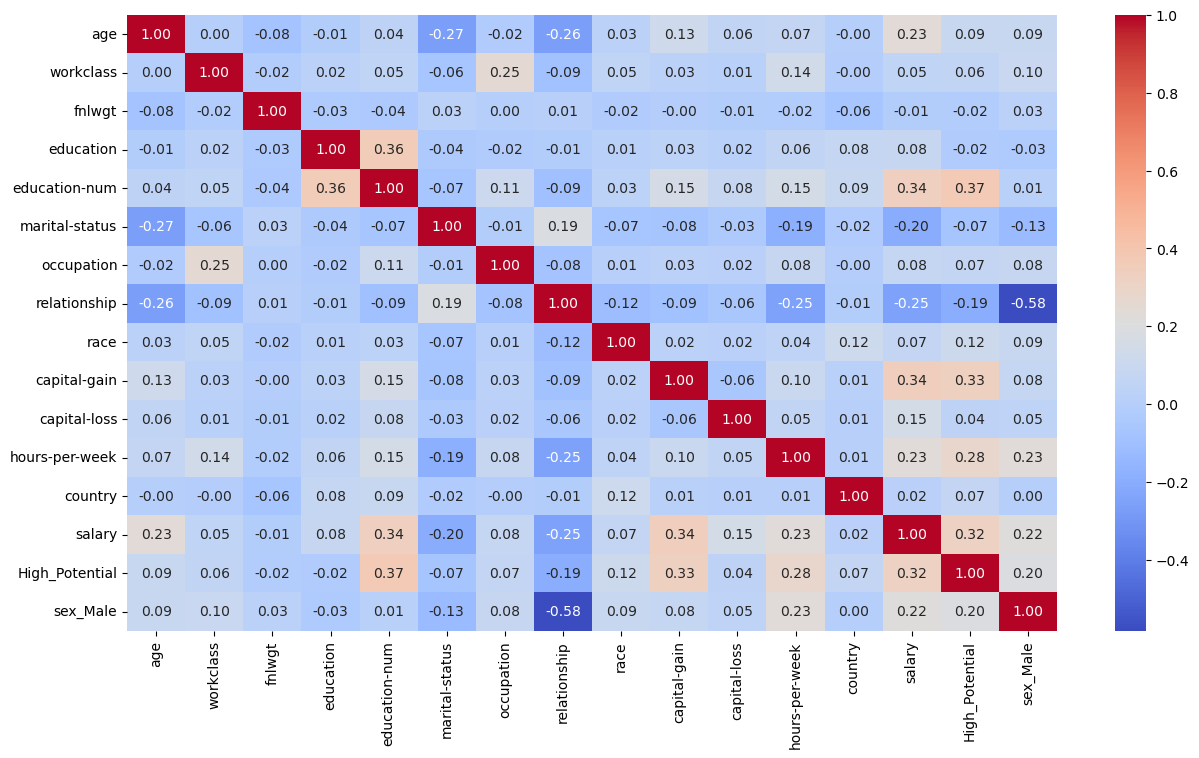

In [21]:
num_cols = df.select_dtypes(include="number")
corr_matrix = num_cols.corr()

plt.figure(figsize=(15, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)


training+feature scaling

In [22]:
df.head()
df.info()
df.drop(columns=['High_Potential_Label'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   32561 non-null  int64  
 1   workclass             32561 non-null  int64  
 2   fnlwgt                32561 non-null  float64
 3   education             32561 non-null  int64  
 4   education-num         32561 non-null  float64
 5   marital-status        32561 non-null  int64  
 6   occupation            32561 non-null  int64  
 7   relationship          32561 non-null  int64  
 8   race                  32561 non-null  int64  
 9   capital-gain          32561 non-null  int64  
 10  capital-loss          32561 non-null  float64
 11  hours-per-week        32561 non-null  int64  
 12  country               32561 non-null  int64  
 13  salary                32561 non-null  int64  
 14  High_Potential        32561 non-null  int64  
 15  High_Potential_Labe

In [23]:
X = df.drop("High_Potential", axis=1)
y = df["High_Potential"]

In [24]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: High_Potential, dtype: int64

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,country,salary,sex_Male
14160,10,4,160178.0,15,10.0,0,1,1,4,0,0.0,37,38,0,0.0
27048,28,7,50567.0,11,9.0,2,4,5,4,0,0.0,39,38,0,0.0
28868,12,4,185908.0,9,13.0,2,4,0,2,0,0.0,54,38,1,1.0
5667,13,4,190040.0,9,13.0,4,7,1,4,0,0.0,39,38,0,0.0
7827,12,6,189346.0,15,10.0,0,3,1,4,27,0.0,49,38,0,1.0


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
X_test_scaled

array([[-0.84876107,  0.08847544, -0.28110745, ...,  0.26333357,
        -0.56304432, -1.41882738],
       [ 0.47110292,  2.15107222, -1.32273149, ...,  0.26333357,
        -0.56304432, -1.41882738],
       [-0.70210952,  0.08847544, -0.03659744, ...,  0.26333357,
         1.77605911,  0.70480737],
       ...,
       [ 0.61775447,  0.08847544,  1.56217302, ...,  0.26333357,
         1.77605911,  0.70480737],
       [-0.84876107,  0.08847544, -1.38844415, ...,  0.26333357,
        -0.56304432, -1.41882738],
       [-1.50869307,  0.08847544, -1.55773858, ...,  0.26333357,
        -0.56304432,  0.70480737]])

Train and Evaluate models

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7601918465227818
Recall:  0.5701438848920863
F1 score:  0.6515930113052415
Accuracy:  0.9479502533394749
CM:  [[5857  100]
 [ 239  317]]


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.8522727272727273
Recall:  0.8093525179856115
F1 score:  0.8302583025830258
Accuracy:  0.9717488100721634
CM:  [[5879   78]
 [ 106  450]]


In [31]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.42083675143560295
Recall:  0.9226618705035972
F1 score:  0.5780281690140845
Accuracy:  0.8849992323046215
CM:  [[5251  706]
 [  43  513]]


Feature Engineering

In [32]:
# Add or Tranform features
df["education-num_sq"] = df["education-num"] ** 2
df["capital-gain_sq"] = df["capital-gain"] ** 2
df["salary_sq"] = df["salary"] ** 2

# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"])

X = df.drop(columns=["High_Potential", "education-num", "capital-gain","salary"])
y = df["High_Potential"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
X_train.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,capital-loss,hours-per-week,country,sex_Male,education-num_sq,capital-gain_sq,salary_sq
5514,16,2,198183.0,9,4,10,1,4,0.0,49,38,0.0,169.0,0,1
19777,19,4,86459.0,8,2,4,0,4,1887.0,49,38,1.0,121.0,0,1
10781,41,6,203039.0,6,5,3,1,4,0.0,39,38,1.0,25.0,0,0
32240,4,4,180190.0,8,2,5,0,4,0.0,45,38,1.0,121.0,0,0
9876,10,4,279872.0,15,0,8,1,4,0.0,39,38,1.0,100.0,0,0


In [34]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

y_pred = log_model.predict(X_test_scaled)

# Evaluation
print("Logistic Regression Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Logistic Regression Model
Precision:  0.7418546365914787
Recall:  0.5323741007194245
F1 score:  0.6198952879581152
Accuracy:  0.9442653155228006
CM:  [[5854  103]
 [ 260  296]]


In [35]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

# Evaluation
print("KNN Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

KNN Model
Precision:  0.8799212598425197
Recall:  0.8039568345323741
F1 score:  0.8402255639097744
Accuracy:  0.9738983571318901
CM:  [[5896   61]
 [ 109  447]]


In [36]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

y_pred = nb_model.predict(X_test_scaled)

# Evaluation
print("Naive Bayes Model")
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ", f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("CM: ", confusion_matrix(y_test, y_pred))

Naive Bayes Model
Precision:  0.3947163947163947
Recall:  0.9136690647482014
F1 score:  0.5512750949538795
Accuracy:  0.8730231844004299
CM:  [[5178  779]
 [  48  508]]
